      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

<ipython-input-4-34723a1ea241>:16: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # Replace with appropriate method based on analysis
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


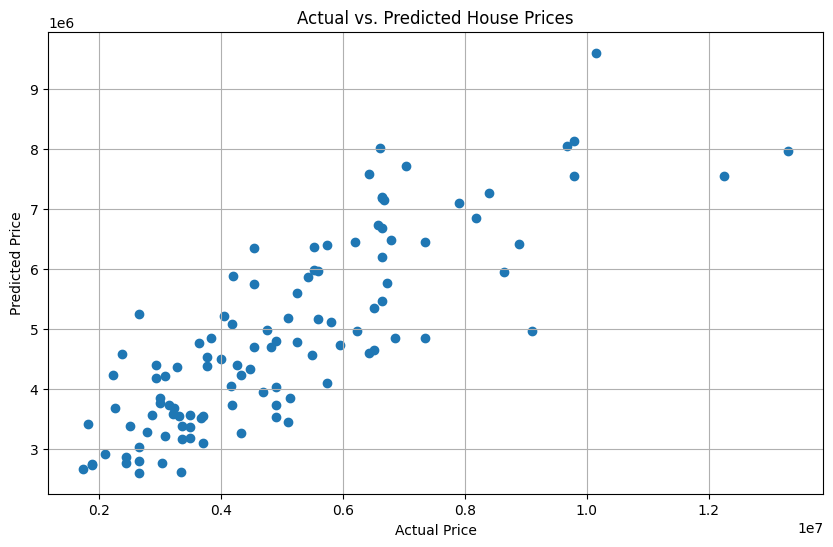

[ 510068.81837905   58121.71282497  549455.67323695  351477.95400015
  -64864.26023307   64864.26023307  -43331.79967555   43331.79967554
  -93537.04588369   93537.04588369  -69690.73830499   69690.73830499
 -183847.17192598  183847.17192598 -111778.83853871   27688.67317032
   93643.22635386   45135.29899848 -133639.23413137  133639.23413137
   80813.47106182   28688.88298412 -105446.74829856]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load data
data = pd.read_csv("Housing.csv")

# Explore and prepare data
print(data.head())  # Examine initial data
print(data.info())  # Check data types, missing values
print(data.describe())  # Summary statistics for numerical features

# Handle missing values
data.fillna(data.mean(), inplace=True)  # Replace with appropriate method based on analysis

# Encode categorical features
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating",
                       "airconditioning", "parking", "prefarea", "furnishingstatus"]
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = pd.concat([data.drop(categorical_features, axis=1),
                          pd.DataFrame(encoder.fit_transform(data[categorical_features]))], axis=1)

# Create target variable and numerical features
X = encoded_data.drop("price", axis=1)
y = encoded_data["price"]

X.columns = X.columns.astype(str)

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

# Interpret model coefficients
print(model.coef_)  # Analyze relationship between features and price
